In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

## 1

Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [15]:
def calc_logloss(y, y_pred):
    y_pred = np.clip(y_pred,0.00001,0.99999)
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [16]:
#проверим функцию calc_logloss 
y_pred = np.array([0,0.23,1])
y = np.array([0,0,1])
calc_logloss(y, y_pred)

0.0871282547448027

## 2

На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss не превышал значение 0.3 (0.1). Как изменились веса?

In [19]:
# импортируем необходимые данные
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика

In [24]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X))
        #if i % (iterations / 10) == 0:
            #print(i, w, err)
    return w

def standardization(x: np.ndarray) -> np.ndarray:
    s = (x - x.mean()) / x.std()
    return s

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

построим график зависимости количества итераций от ошибки

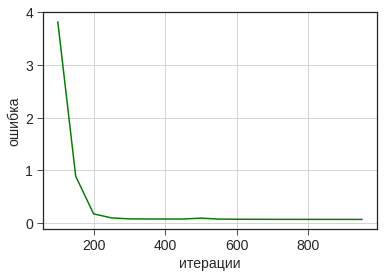

In [89]:
X_st = X.copy()
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 2]

alpha = 10
iterations = list(range(100,1000,50))
err = []
data_w = []

for iteration in iterations:
    w = eval_LR_model(X_st, y, iteration,alpha)
    y_pred = sigmoid(np.dot(X_st, w))
    err.append(calc_logloss(y, y_pred))
    data_w.append(list(w))
plt.plot(iterations,  err, color='green')
plt.xlabel('итерации')
plt.ylabel('ошибка')
plt.grid()

посмотрим как изменялись веса при разных итерациях

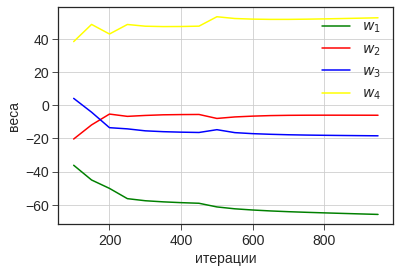

In [90]:
data_w = np.array(data_w)
plt.plot(iterations,  data_w.T[0], color='green',label=r'$w_1$')
plt.plot(iterations,  data_w.T[1], color='red',label=r'$w_2$')
plt.plot(iterations,  data_w.T[2], color='blue',label=r'$w_3$')
plt.plot(iterations,  data_w.T[3], color='yellow',label=r'$w_4$')
plt.xlabel('итерации')
plt.ylabel('веса')
plt.grid()
plt.legend();

подберем идеальные гиперпараметры

In [91]:
w = eval_LR_model(X_st, y, 300,8)
y_pred = sigmoid(np.dot(X_st, w))
calc_logloss(y, y_pred)

0.09677511175696164

In [92]:
w

array([-46.1655013 ,  -5.07068276, -12.00017076,  38.75390134])

## 3

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model.

In [96]:
def calc_pred_proba(X,w):
    return sigmoid(np.dot(X, w)).round(2)

In [98]:
calc_pred_proba(X_st,w)

array([0.33, 0.  , 1.  , 0.04, 0.99, 0.04, 1.  , 0.  , 0.62, 1.  ])

## 4
Создайте функцию calc_pred, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, а также порог вероятности.

In [100]:
def calc_pred(X,w,porog):
    return np.where(sigmoid(np.dot(X, w)) > porog, 1, 0)

In [101]:
calc_pred(X_st,w,0.5)

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])